<a href="https://colab.research.google.com/github/ranjan2829/Quant/blob/main/Intro_Quant_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install vega


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.2/190.2 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.4 MB/s eta 0:00:00


In [4]:
import numpy
import pytest
import scipy
import statsmodels
import altair
import vega
import vega_datasets
import sklearn
import tensorflow
import matplotlib

In [5]:
import random

possible_states = [1, 2, 3, 4, 5, 6]

random.choice(possible_states)

4

In [6]:

NUM_TRIALS = 100000

results = [random.choice(possible_states) for i in range(NUM_TRIALS)]


In [7]:
from collections import Counter
counts = Counter(results)
counts


Counter({2: 16597, 3: 16779, 5: 16495, 1: 16618, 6: 16702, 4: 16809})

In [8]:
import altair as alt
import vega
alt.renderers.enable('default')

RendererRegistry.enable('default')

In [9]:
import pandas as pd
die=pd.DataFrame({
    'state':possible_states,
    'count':[counts.get(state,0)for state in possible_states]
})

In [10]:
print(die)

   state  count
0      1  16618
1      2  16597
2      3  16779
3      4  16809
4      5  16495
5      6  16702


In [13]:
import pandas as pd

die_rolls = pd.DataFrame({
    'state': possible_states,
    'count': [counts.get(state, 0) for state in possible_states]
})

print(die_rolls)

alt.Chart(die_rolls).mark_bar().encode(
    x='state:O',
    y='count'
)

   state  count
0      1  16618
1      2  16597
2      3  16779
3      4  16809
4      5  16495
5      6  16702


alt.Chart(...)

In [14]:
%%html
<!-- Run me, but there is  need to worry about this code -
    it makes the equation in the next cell larger and more readable -->
<style>
    .big_function {font-size: 200%;}
</style>

In [15]:
# Let's plot that out
import numpy as np
x = np.linspace(-5, 5, 1000)  # 1000 linearly spaced points starting -5 going to 5

mean = 0
sigma = 1

y = (1 / np.sqrt(2 * np.pi * sigma ** 2)) * np.e ** -((x - mean) ** 2) / (2 * sigma ** 2)

# Or a bit more nicely laid out...

scale_term = (1 / np.sqrt(2 * np.pi * sigma ** 2))
exponent_term = ((x - mean) ** 2) / (2 * sigma ** 2)
y = scale_term * np.e ** -exponent_term

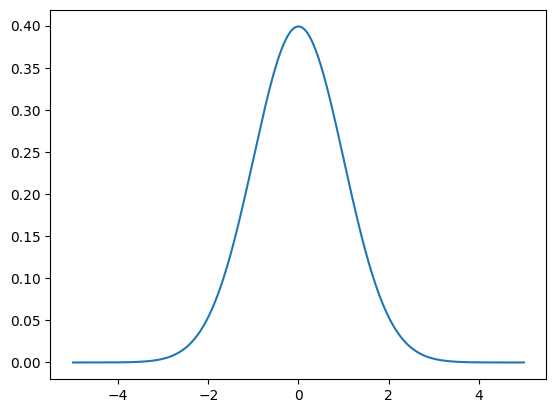

In [16]:
from matplotlib import pyplot as plt
plt.plot(x, y, "-");

In [17]:
from scipy import stats

In [18]:
n = stats.norm(0, 1)



In [19]:
# Generate 10 random variates from this distribution
n.rvs(10)

array([ 1.30095447,  0.29893868,  0.68392134, -0.77888679, -0.13595198,
        0.71593844, -0.21292473,  1.74915168, -0.63380304,  0.23932297])

In [20]:
results=n.rvs(10)

In [21]:
Counter(results
        )

Counter({0.9119126703980923: 1,
         1.3321441676615242: 1,
         1.3510876562716785: 1,
         0.9125726546980241: 1,
         -0.08099945711755734: 1,
         -0.3745796028897974: 1,
         0.7659895436666627: 1,
         -0.26938470517503293: 1,
         1.0253809087304573: 1,
         -0.3271189247416022: 1})

In [23]:
normal=pd.DataFrame({"value":n.rvs(5000)})
alt.Chart(normal).mark_bar().encode(
    alt.X("value",bin=alt.Bin(maxbins=100)),
    y='count()',
    color=alt.value('#287E1E')
)

alt.Chart(...)

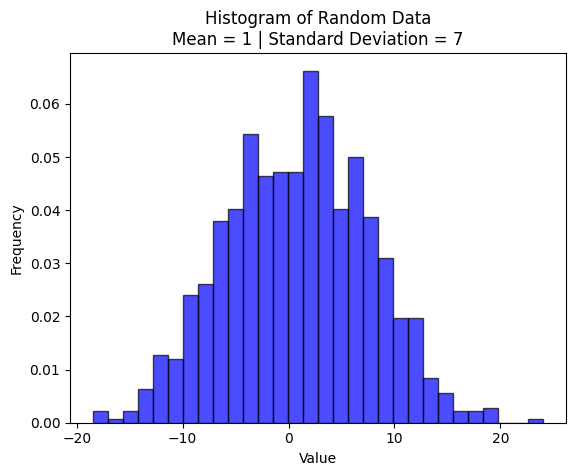

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histogram(mean, standard_deviation):
    # Generate random data with the given mean and standard deviation
    data = np.random.normal(mean, standard_deviation, 1000)

    # Plot the histogram
    plt.hist(data, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')

    # Add labels and title
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of Random Data\nMean = {} | Standard Deviation = {}'.format(mean, standard_deviation))

    # Show the plot
    plt.show()

# Example usage with mean=1 and standard_deviation=7
plot_histogram(1, 7)


In [28]:
distribution = stats.norm()


In [29]:
x = np.linspace(-5, 5, 1000)
y_cdf = distribution.cdf(x)

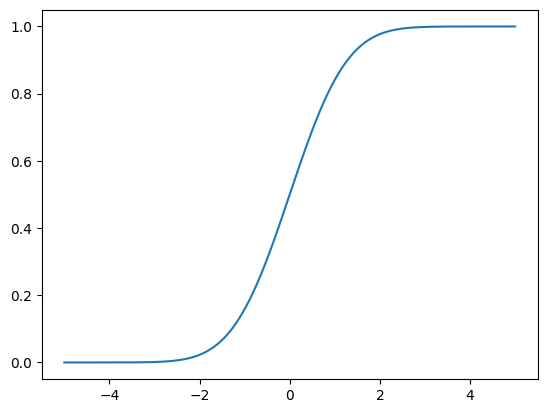

In [30]:
plt.plot(x, y_cdf);


At x=1.2, y=0.885


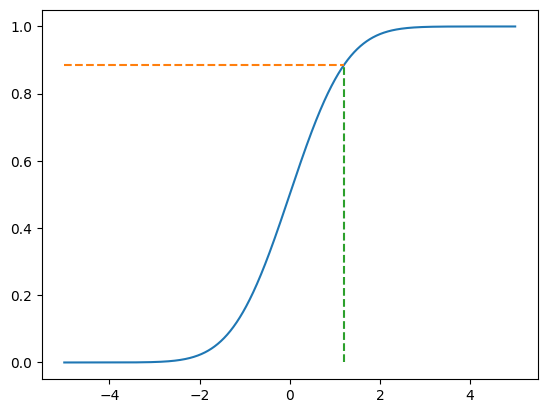

In [31]:
x_0 = 1.2
y_0 = distribution.cdf(x_0)

plt.plot(x, y_cdf)
plt.plot([x[0], x_0], [y_0, y_0], '--')
plt.plot([x_0, x_0], [0, y_0], '--')
print("At x={0}, y={1:.3f}".format(x_0, y_0))


In [34]:
stats.norm?

In [43]:
import pandas as pd
import altair as alt
from scipy.stats import norm

def plot_histogram_normal(mean, standard_deviation, color):
    distribution = norm(mean, standard_deviation)
    normal_values = pd.DataFrame({"value": distribution.rvs(10000)})

    chart = alt.Chart(normal_values).mark_bar().encode(
        alt.X("value", bin=alt.Bin(extent=[-10, 10], step=0.1)),  # Adjust extent and step as needed
        alt.Y('count()', stack=None),
        color=alt.value(color)
    ).properties(width=400)  # Adjust width as needed
    return chart

chart_1 = plot_histogram_normal(0, 1, "red")
chart_2 = plot_histogram_normal(3, 1, "blue")

concatenated_chart = alt.hconcat(chart_1, chart_2)
concatenated_chart


alt.HConcatChart(...)

In [44]:


chart_1 + chart_2

alt.LayerChart(...)